In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt, rcParams

In [2]:
data_2012_2015 = pd.read_csv("data/Git/dependencies_2012_to_2015.csv")
data_2016_2018 = pd.read_csv("data/Git/dependencies_2016_to_2018.csv")
data_2019_2022 = pd.read_csv("data/Git/dependencies_2019_to_2022.csv")

In [3]:
data_2012_2015 = data_2012_2015[data_2012_2015["average-revs"] >= 5]

In [4]:
data_2012_2015[data_2012_2015["entity"] == "ODIN_II/SRC/subtractions.c"]

,entity,coupled,degree,average-revs
6,ODIN_II/SRC/subtractions.c,ODIN_II/SRC/subtractions.h,52,10


In [5]:
data_2012_2015[data_2012_2015["coupled"] == "ODIN_II/SRC/adders.h"]

,entity,coupled,degree,average-revs
11,ODIN_II/SRC/adders.c,ODIN_II/SRC/adders.h,48,15


In [6]:
data_2012_2015.max()

entity          ODIN_II/SRC/subtractions.c
coupled                ODIN_II/SRC/types.h
degree                                  68
average-revs                            19
dtype: object

In [7]:
data_2019_2022

,entity,coupled,degree,average-revs
0,ODIN_II/SRC/blif_elaborate.cpp,ODIN_II/SRC/read_yosys_blif.cpp,81,11
1,ODIN_II/SRC/GenericReader.cc,ODIN_II/SRC/GenericWriter.cc,80,10
2,ODIN_II/SRC/Yosys.cpp,ODIN_II/SRC/include/Yosys.hpp,76,7
3,ODIN_II/SRC/include/odin_util.h,ODIN_II/SRC/odin_util.cpp,72,28
4,ODIN_II/SRC/include/odin_error.h,ODIN_II/SRC/odin_error.cpp,69,12
5,ODIN_II/SRC/ast_loop_unroll.cpp,ODIN_II/SRC/include/ast_loop_unroll.h,68,21
6,ODIN_II/SRC/include/node_creation_library.h,ODIN_II/SRC/node_creation_library.cpp,66,14
7,ODIN_II/SRC/BLIFReader.cc,ODIN_II/SRC/blif_elaborate.cc,55,59
8,ODIN_II/SRC/include/ast_elaborate.h,ODIN_II/SRC/include/ast_loop_unroll.h,53,15
9,ODIN_II/SRC/blif_elaborate.cc,ODIN_II/SRC/include/subckt_types.h,52,40


In [8]:
print(len(data_2016_2018))# =
data_2016_2018 = data_2016_2018[data_2016_2018["average-revs"] > 5]

182


In [9]:
data_2016_2018.describe()

,degree,average-revs
count,179.000000,179.000000
mean,55.949721,12.754190
std,15.825337,4.073196
min,31.000000,6.000000
25%,44.000000,9.000000
50%,53.000000,13.000000
75%,66.000000,15.000000
max,94.000000,30.000000


In [10]:
print(len(data_2019_2022))# =
data_2019_2022 = data_2019_2022[data_2019_2022["average-revs"] > 5]

44


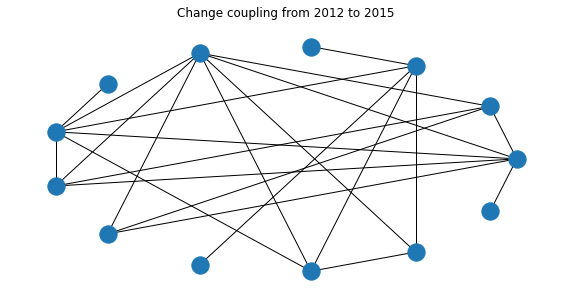

In [11]:
def draw_circle_graph(dataframe, figure_name: str, file_name: str):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    g = nx.from_pandas_edgelist(dataframe,
                                source="entity",
                                target="coupled",
                                edge_attr="degree",
                                edge_key="entity",
                                )
    nx.draw_circular(g, ax=axes)
    axes.set_title(figure_name)
    fig.savefig(f"figures/Git/{file_name}")
    return g
g_2012_2015 = draw_circle_graph(data_2012_2015,
                                "Change coupling from 2012 to 2015",
                                "coupling_2012_2015.jpg")

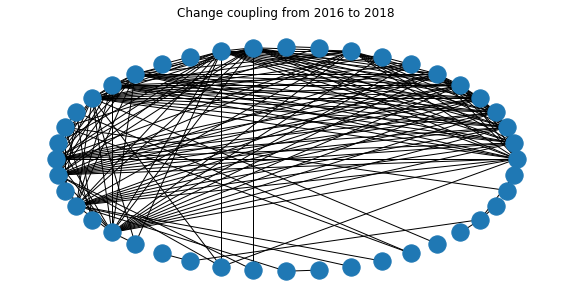

In [12]:
g_2016_2018 = draw_circle_graph(data_2016_2018,
                                "Change coupling from 2016 to 2018",
                                "coupling_2016_2018.jpg")

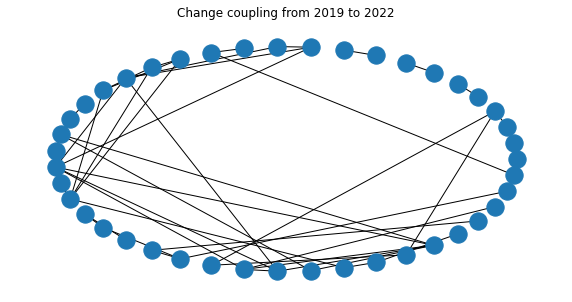

In [13]:
g_2019_2022 = draw_circle_graph(data_2019_2022,
                                "Change coupling from 2019 to 2022",
                                "coupling_2019_2022.jpg")


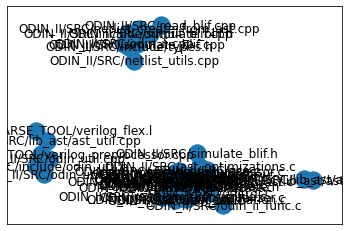

In [14]:
nx.draw_networkx(g_2016_2018)

from pyvis.network import Network

net = Network(height="1000px", width="1000px", )
net.from_nx(g_2019_2022)
#net.toggle_physics(False)
net.show("example.html")

In [15]:
years = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
odin_src_2012_2022_log = open("data/Git/git_history/odin_src_2012_to_2022.log", "r").read()
odin_whole_2012_2022_log = open("data/Git/git_history/odin_complete_2012_to_2022.log", "r").read()
years_commit_count = [odin_src_2012_2022_log.count(i) for i in years]
years_all_commit_count = [odin_whole_2012_2022_log.count(i) for i in years]


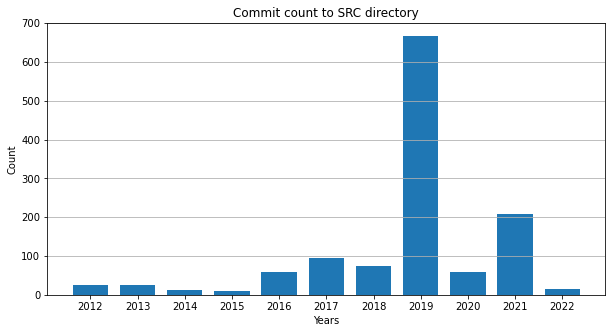

In [16]:
import numpy as np
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, years_commit_count, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Count")
axes.set_title("Commit count to SRC directory")
fig.savefig("figures/Git/commit_count_in_src_odin_dir.jpg")

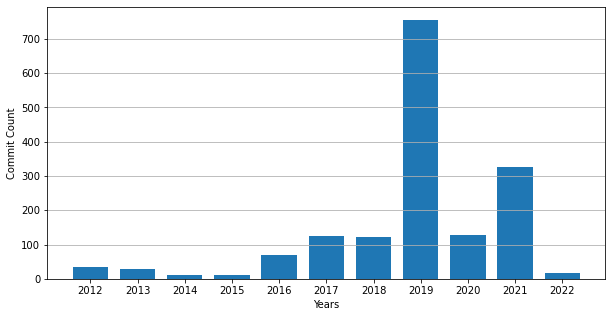

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, years_all_commit_count, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Commit Count")
#axes.set_title("Commit count in ODIN_II directory")
fig.savefig("figures/Git/13_commit_count_in_whole_odin_dir.svg", format='svg', dpi=1200)

In [18]:
import json
import seaborn as sb
import pandas as pd


def json_to_panda(path: str):
    commit_data = {
    "commit_sha": [],
    "author": [],
    "date": [],
    "year": [],
    "commit_msg": [],
    "lines_added": [],
    "lines_deleted": [],
    "files_changed": []
    }
    with open(path) as json_file:
        data = json.load(json_file)
        for commit_sha in data:
            commit_data["commit_sha"].append(commit_sha)
            commit_data["author"].append(data[commit_sha]["author"])
            commit_data["date"].append(data[commit_sha]["date"])
            year, month, day = data[commit_sha]["date"].split("-")
            commit_data["year"].append(int(year))
            commit_data["commit_msg"].append(data[commit_sha]["msg"])
            lines_added = 0
            lines_deleted = 0
            files_changed_count = 0
            for files_changed in data[commit_sha]["files_changed"]:
                file_name = files_changed["file_name"]
                if file_name.endswith(".c") or \
                        file_name.endswith(".cpp") or \
                        file_name.endswith(".h") or \
                        file_name.endswith(".hpp") or \
                        file_name.endswith(".cc"):
                    lines_added += int(files_changed["lines_added"])
                    lines_deleted += int(files_changed["lines_deleted"])
                    files_changed_count += 1
            commit_data["lines_added"].append(lines_added)
            commit_data["lines_deleted"].append(lines_deleted)
            commit_data["files_changed"].append(files_changed_count)
    commit_data = pd.DataFrame(commit_data)
    commit_data["lines_changed"] = commit_data["lines_added"] + commit_data["lines_deleted"]
    commit_data["commit_msg"] = [msg.lower() for msg in commit_data["commit_msg"]]
    return commit_data
#commit_data_complete = json_to_panda("data/Git/odin_complete_2012_to_2022.json")

commit_data_src = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
commit_data_src

,commit_sha,author,date,year,commit_msg,lines_added,lines_deleted,files_changed,lines_changed
0,b249b97d2,Seyed Alireza Damghani,2022-05-18,2022,[yosys+odin]: - regenerate 'odin_tech_basi...,3,0,1,3
1,970d6f7b0,Seyed Alireza Damghani,2022-05-13,2022,"[yosys+odin]: perform the yosys ""autoname"" pas...",2,2,1,4
2,a9ce736ac,Seyed Alireza Damghani,2022-05-09,2022,merge pull request #2020 from cas-atlantic/rem...,0,0,0,0
3,720c4e9e6,alirezazd,2022-05-06,2022,removed unused if statements & removed related...,11,26,1,37
4,7caec7b39,Seyed Alireza Damghani,2022-05-05,2022,[yosys+odin]: creating extra pins to extend th...,13,6,3,19
...,...,...,...,...,...,...,...,...,...
1246,cb92dd4e5,Salihir Wang,2012-08-14,2012,git-svn-id: https://vtr-verilog-to-routing.goo...,7,6,1,13
1247,06b86e9ca,Salihir Wang,2012-08-13,2012,git-svn-id: https://vtr-verilog-to-routing.goo...,1102,50,10,1152
1248,411396430,Salihir Wang,2012-08-10,2012,git-svn-id: https://vtr-verilog-to-routing.goo...,277,150,1,427
1249,e060320a5,Kenneth Kent,2012-06-15,2012,code added for carry chain adders. this does n...,1193,7,12,1200


In [19]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
commit_data["lines_changed"].quantile(.97)

1345.0

In [20]:
lol = commit_data[commit_data["lines_changed"] > commit_data["lines_changed"].quantile(.97)]
print(len(lol))
lol

38


,commit_sha,author,date,year,commit_msg,lines_added,lines_deleted,files_changed,lines_changed
37,ca76b4a6c,Seyed Alireza Damghani,2021-08-06,2021,[odin]: integrate yosys elaborator inside odin...,897,491,21,1388
39,78f3cbbca,Seyed Alireza Damghani,2021-08-03,2021,[odin]: make format\n,828,847,26,1675
41,4806a2e93,Seyed Alireza Damghani,2021-08-02,2021,[odin]: - adding file-scope comments \t- packi...,11019,9565,69,20584
51,1c051ae45,Seyed Alireza Damghani,2021-07-23,2021,[odin]: adding nr/nrnw support using muxed rea...,928,442,16,1370
99,9d7715cfd,Seyed Alireza Damghani,2021-06-27,2021,[odin]: adding a new name convention for .cc f...,6426,6393,32,12819
126,e5f2ad45c,Seyed Alireza Damghani,2021-06-19,2021,[odin]: - adding support for $pow sub-circuit ...,3835,3329,17,7164
144,a1aaf488a,Seyed Alireza Damghani,2021-06-05,2021,[odin]: - adding support for $div sub-circuit ...,1215,545,2,1760
193,6e6121da8,Seyed Alireza Damghani,2021-05-05,2021,[odin]: creating a general blif reader\n,2763,3647,12,6410
195,be290273c,Seyed Alireza Damghani,2021-05-03,2021,[odin]: separate the source code of blif reade...,1766,1650,4,3416
197,aea4650e1,Seyed Alireza Damghani,2021-04-29,2021,[odin]: adding a generic output writer\n,1806,1732,16,3538


In [21]:
commit_data_src["msg_len"] = [len(msg) for msg in commit_data_src["commit_msg"]]

<AxesSubplot:xlabel='msg_len', ylabel='Count'>

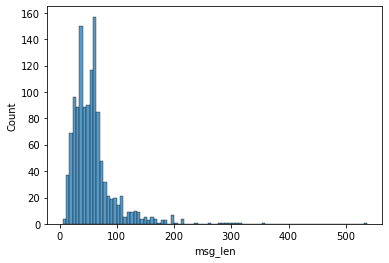

In [22]:
sb.histplot(x="msg_len", data=commit_data_src)

In [23]:
all_msg = ""
for msg in commit_data_src["commit_msg"]:
    all_msg += msg


In [24]:
msg_2019 = ""
for msg in commit_data_src[commit_data_src["year"] == 2019].values:
    msg_2019 += msg[4]

In [25]:
msg_before_2016 = ""
for msg in commit_data_src[(commit_data_src["year"] < 2016)].values:
    msg_before_2016 += msg[4]

In [26]:
msg_expect_2019_2021 = ""
for msg in commit_data_src[(commit_data_src["year"] != 2019) & (commit_data_src["year"] != 2021)].values:
    msg_expect_2019_2021 += msg[4]

In [27]:
msg_after_2019 = ""
for msg in commit_data_src[(commit_data_src["year"] > 2019)].values:
    msg_after_2019 += msg[4]

In [28]:
with open("data/Git/all_commit_msg.txt", "w", encoding="utf-8") as file:
   file.write(all_msg)

with open("data/Git/2019_commit_msg.txt", "w", encoding="utf-8") as file:
    file.write(msg_2019)

with open("data/Git/before_2016_commit_msg.txt", "w", encoding="utf-8") as file:
    file.write(msg_before_2016)

with open("data/Git/except_2019_2021_commit_msg.txt", "w", encoding="utf-8") as file:
    file.write(msg_expect_2019_2021)

with open("data/Git/after_2019_commit_msg.txt", "w", encoding="utf-8") as file:
    file.write(msg_after_2019)

In [29]:
from wordle import Wordle, export_wordcloud, frequency_from_file
import io

word_freqency = frequency_from_file("data/Git/all_commit_msg.txt")
word_freqency_2019 = frequency_from_file("data/Git/2019_commit_msg.txt")
word_freqency_before_2016 = frequency_from_file("data/Git/before_2016_commit_msg.txt")
word_freqency_except_2019_2021 = frequency_from_file("data/Git/except_2019_2021_commit_msg.txt")
word_freqency_after_2019 = frequency_from_file("data/Git/after_2019_commit_msg.txt")

In [30]:
def costum_word_clean(word_freq: dict):
    word_freq["to"] = 0
    word_freq["the"] = 0
    word_freq["in"] = 0
    word_freq["for"] = 0
    word_freq["signed-off-by"] = 0
    word_freq["and"] = 0
    word_freq["seyed"] = 0
    word_freq["alireza"] = 0
    word_freq["damghani"] = 0
    word_freq["a"] = 0
    word_freq["<sdamghan@unb.ca>[odin]"] = 0
    word_freq["of"] = 0
    word_freq["is"] = 0
    word_freq["with"] = 0
    word_freq["into"] = 0
    word_freq["from"] = 0
    word_freq["aaron"] = 0
    word_freq["merge"] = 0
    word_freq["pull"] = 0
    word_freq["when"] = 0
    word_freq["an"] = 0
    word_freq["can"] = 0
    word_freq["ii"] = 0
    word_freq["some"] = 0
    word_freq["request"] = 0
    word_freq["odin"] = 0
    word_freq["odin_ii"] = 0

costum_word_clean(word_freqency)
costum_word_clean(word_freqency_2019)
costum_word_clean(word_freqency_before_2016)
costum_word_clean(word_freqency_except_2019_2021)
costum_word_clean(word_freqency_after_2019)

In [31]:
def print_wordle_pic(path: str, word_freq: dict):
    w = Wordle(random_state=5678)
    w.generate_from_frequencies(word_freq)
    export_wordcloud(w, outfile=path)
print_wordle_pic("figures/Git/all_word_freq.png", word_freqency)
print_wordle_pic("figures/Git/16_2019_word_freq.png", word_freqency_2019)
print_wordle_pic("figures/Git/17_before_2016_word_freq.png", word_freqency_before_2016)
print_wordle_pic("figures/Git/18_except_2019_2021_word_freq.png", word_freqency_except_2019_2021)

print_wordle_pic("figures/Git/after_2019_word_freq.png", word_freqency_after_2019)

In [32]:
adding = ["add", "adding", "added", "new", "more"]
fixing = ["fix", "fixing", "correcting", "correct", "solved",
          "solving", "resolving", "resolve",
          "cleaning", "clean",
          "mem"] # improving
updating = ["updating", "update", "refined", "refining", "refactor",
            "improving", "improve", "optimization", "optimize",

            "regenerating",
            "formating", "format", "formatting", "reformating"]
remove = ["remove","removing", "stop"]
regenerating = []
reformating = ["formating", "format", "formatting"]
improving = ["improving", "improve", "optimization", "optimize"]
modified = ["change", "restructure", "do", "modified", "changing"]
pull_request = ["merge"]


commit_type = []
for msg in commit_data_src["commit_msg"]:
    msg = msg.lower()
    add = False
    fix = False
    removeing = False
    update = False
    modifi = False
    is_pull_request = False
    for add_keyword in adding:
        if add_keyword in msg:
            add = True
            break
    for fix_keyword in fixing:
        if fix_keyword in msg:
            fix = True
    for remove_keyword in remove:
        if remove_keyword in msg:
            removeing = True
    for update_keyword in updating:
        if update_keyword in msg:
            update = True
    for modified_keyword in modified:
        if modified_keyword in msg:
            modifi = True
    for pull_keywork in pull_request:
        if pull_keywork in msg:
            is_pull_request = True
    if add and not fix and not removeing and not update and not modifi and not is_pull_request:
        commit_type.append("add")
    elif not add and fix and not removeing and not update and not modifi and not is_pull_request:
        commit_type.append("fix")
    elif not add and not fix and removeing and not update and not modifi and not is_pull_request:
        commit_type.append("remove")
    elif not add and not fix and not removeing and update and not modifi and not is_pull_request:
        commit_type.append("updating")
    elif not add and not fix and not removeing and not update and modifi and not is_pull_request:
        commit_type.append("modified")
    elif not add and not fix and not removeing and not update and not modifi and is_pull_request:
        commit_type.append("PR")
    elif add or fix or removeing or update or modifi or is_pull_request:
        commit_type.append("mixed")
    else:
        commit_type.append("other")
commit_data_src["commit_type"] = commit_type

<AxesSubplot:xlabel='commit_type', ylabel='Count'>

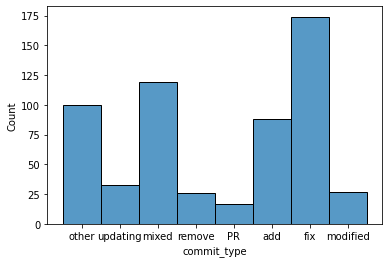

In [33]:
commit_data_src_except_2019 = commit_data_src[commit_data_src["year"] != 2019]
sb.histplot(data=commit_data_src_except_2019, x="commit_type")

<AxesSubplot:xlabel='commit_type', ylabel='Count'>

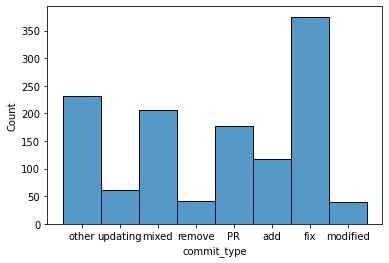

In [34]:
sb.histplot(data=commit_data_src, x="commit_type")

In [35]:
for msg in commit_data_src[commit_data_src["commit_type"] == "other"].values:
    #print(msg[4])
    pass

<AxesSubplot:xlabel='year', ylabel='msg_len'>

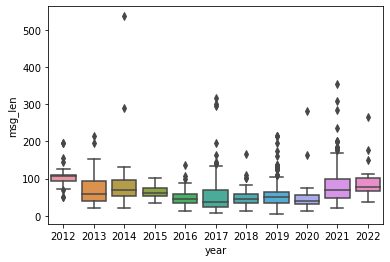

In [36]:
sb.boxplot(data=commit_data_src, x="year", y="msg_len")

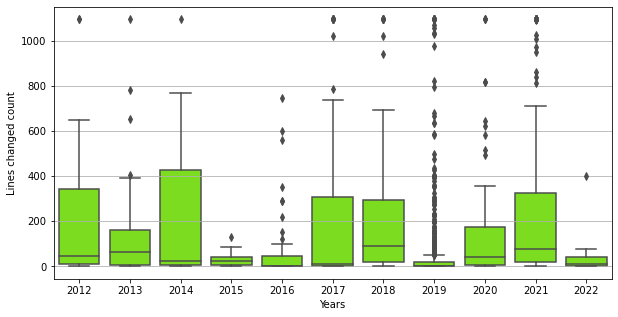

In [56]:

commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
commit_data["lines_changed"].clip(upper=commit_data["lines_changed"].quantile(.96), inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(data=commit_data, x="year", y="lines_changed", ax=axes, color="lawngreen")
#axes.set_title("Lines changed per commit (upper bound 96 percentile)")
axes.set_ylabel("Lines changed count")
axes.set_xlabel("Years")
axes.grid(visible=True, axis="y")
fig.savefig("figures/Git/14_lines_changed_vs_year.svg", format='svg', dpi=1200)

<AxesSubplot:xlabel='year', ylabel='Count'>

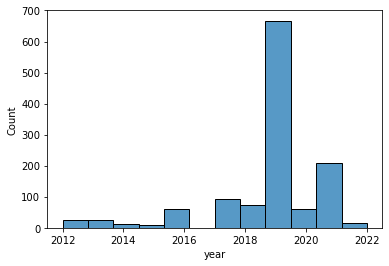

In [38]:
sb.histplot(data=commit_data_src, x="year")

In [39]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
commit_data["lines_changed"].clip(upper=commit_data["lines_changed"].quantile(.90), inplace=True)

lines_chaged_per_author = dict()
for i in years:
    for index, row in commit_data[commit_data["year"] == int(i)].iterrows():
        author_name = row["author"].replace(" ", "_")
        if author_name in lines_chaged_per_author:
            lines_chaged_per_author[author_name] += row["lines_changed"]
        else:
            lines_chaged_per_author[author_name] = row["lines_changed"]
lines_chaged_per_author.values()

dict_values([1013.0, 4239.0, 43.0, 738.0, 10.0, 1571.0, 572.0, 788.0, 10.0, 183.0, 4.0, 580.0, 18.0, 97.0, 3641.0, 1157.0, 746.0, 217.0, 0.0, 0.0, 14.0, 324.0, 258.0, 0.0, 269.0, 29617.0, 357.0, 11.0, 151.0, 932.0, 1644.0, 755.0, 3216.0, 35865.0, 18.0, 3188.0, 12322.0, 20.0, 37.0, 43.0, 664.0, 209.0, 1.0, 51.0, 2.0, 542.0, 453.0, 594.0, 4049.0, 787.0, 8.0, 56.0, 22.0, 451.0, 39.0, 4.0, 37.0, 0.0, 14.0, 16.0])

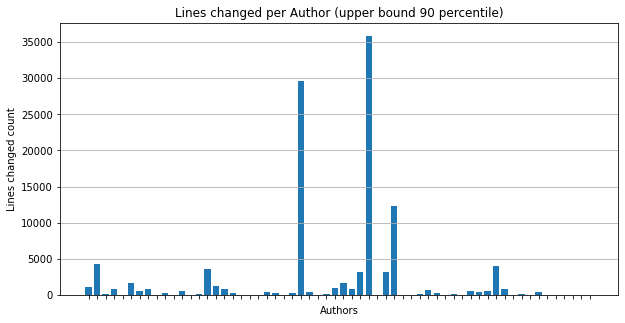

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(lines_chaged_per_author.keys(), lines_chaged_per_author.values(), width)
axes.grid(visible=True, axis="y")
axes.set_xticklabels("")
axes.set_xlabel("Authors")
axes.set_ylabel("Lines changed count")
axes.set_title("Lines changed per Author (upper bound 90 percentile)")
fig.savefig("figures/Git/authors_count_lines_changed.jpg")

In [41]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")


#commit_data["lines_changed"].clip(upper=commit_data["lines_changed"].quantile(.90), inplace=True)

lines_chaged_per_author = dict()
for i in years:
    for index, row in commit_data[commit_data["year"] == int(i)].iterrows():
        author_name = row["author"].replace(" ", "_")
        if author_name in lines_chaged_per_author:
            lines_chaged_per_author[author_name] += row["lines_changed"]
        else:
            lines_chaged_per_author[author_name] = row["lines_changed"]

def gini(x):
    total = 0
    x = np.array(x)
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    g = total / (len(x)**2 * np.mean(x))
    return (len(x) * g) / (len(x) - 1)
print(gini(list(lines_chaged_per_author.values())))

0.9450923154379713


In [42]:

def author_stats(data: pd.DataFrame):
    years = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
    author_count_year = []
    maintainer_count_year = []
    author_written_year = []
    for i in years:
        author_count = {}
        for index, row in data[data["year"] == int(i)].iterrows():
            if row["author"] in author_count:
                author_count[row["author"]] += row["lines_changed"]
            else:
                author_count[row["author"]] = row["lines_changed"]
        author_count_total = 0
        maintainer_count_total = 0
        for author in author_count:
            author_count_total += 1
            if author_count[author] > 2000:
                maintainer_count_total += 1
        maintainer_count_year.append(maintainer_count_total)
        author_count_year.append(author_count_total)
        author_written_year.append(author_count)
    return author_count_year, maintainer_count_year, author_written_year


In [43]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
commit_data["lines_changed"].clip(upper=commit_data["lines_changed"].quantile(.97), inplace=True)
gini_loc_per_author = []
for dic in author_stats(data=commit_data)[2]:
    gini_loc_per_author.append(gini(list(dic.values())))
gini_loc_per_author

[0.7620997766195083,
 0.6549622550038091,
 0.6172383205204022,
 0.47826086956521746,
 0.6404034229828851,
 0.9197984636986867,
 0.857767183154549,
 0.8459742647058826,
 0.6574023932221155,
 0.9991608341665477,
 0.9236588720770289]

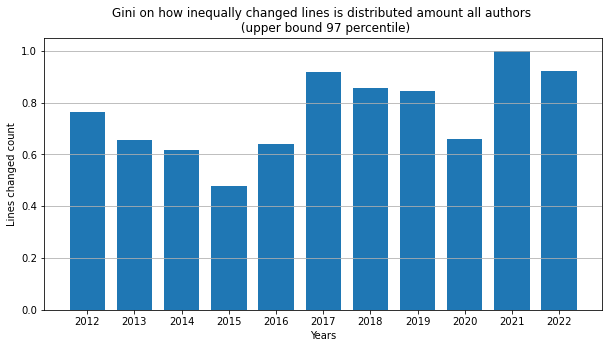

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, gini_loc_per_author, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Lines changed count")
axes.set_title("Gini on how inequally changed lines is distributed amount all authors \n (upper bound 97 percentile)")
fig.savefig("figures/Git/gini_author_lines_change_distri.jpg")

In [45]:
def lines_changed_per_year(data: pd.DataFrame):
    lines_chaged_per_year = []
    for i in years:
        lines_chaged = 0
        for index, row in data[data["year"] == int(i)].iterrows():
            lines_chaged += row["lines_changed"]
        lines_chaged_per_year.append(lines_chaged)
    return lines_chaged_per_year



In [46]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
commit_data["lines_changed"].clip(upper=commit_data["lines_changed"].quantile(.97), inplace=True)
lines_changed_per_year_cleaned = lines_changed_per_year(commit_data)

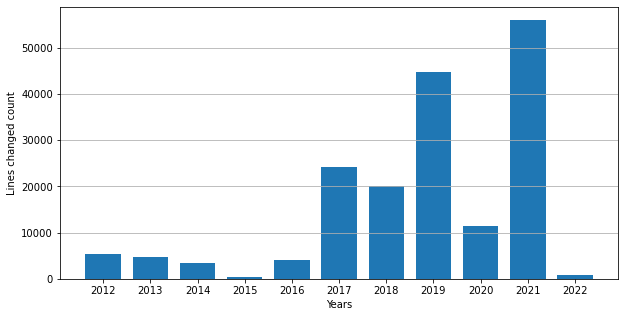

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, lines_changed_per_year_cleaned, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Lines changed count")
#axes.set_title("Lines changed per year (upper bound 97 percentile)")
fig.savefig("figures/Git/15_lines_changed_vs_year_cleaned.svg", format='svg', dpi=1200)

In [48]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
lines_changed_per_year_uncleaned = lines_changed_per_year(commit_data)

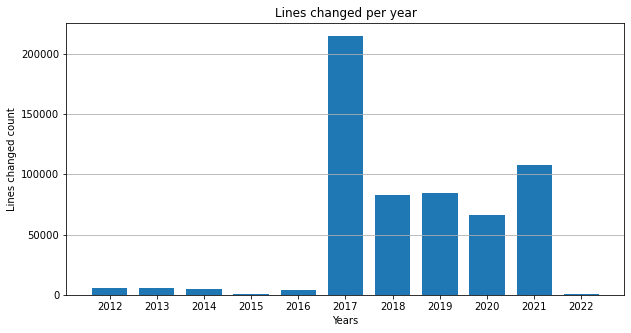

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, lines_changed_per_year_uncleaned, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Lines changed count")
axes.set_title("Lines changed per year")
fig.savefig("figures/Git/lines_changed_vs_year.jpg")

In [50]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
maintainer_count_year = author_stats(data=commit_data)[1]

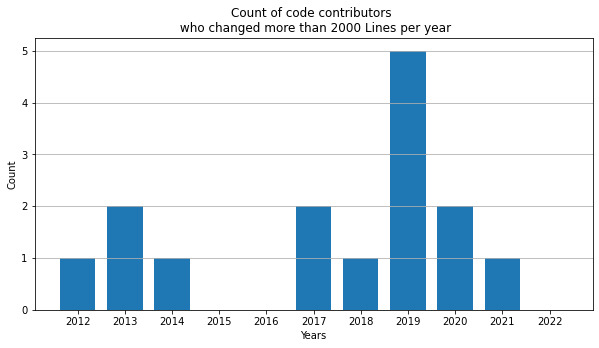

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, maintainer_count_year, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Major contributors count")
axes.set_title("Count of code contributors \n who changed more than 2000 Lines per year")
fig.savefig("figures/Git/20_amount_of_maintainers.svg", format='svg', dpi=1200)

In [52]:
commit_data = json_to_panda("data/Git/odin_src_2012_to_2022_with_msg.json")
author_count_year = author_stats(data=commit_data)[0]

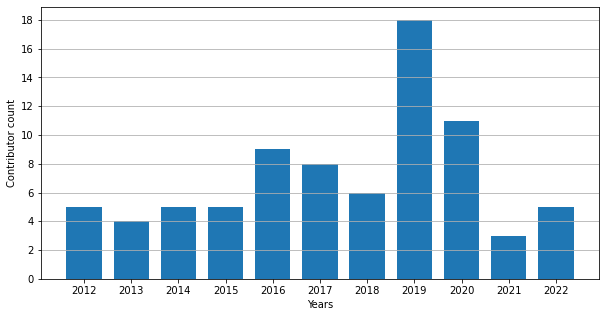

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
axes.bar(ind, author_count_year, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_yticks(range(0, 20, 2))
axes.set_xlabel("Years")
axes.set_ylabel("Contributor count")
#axes.set_title("Total code contributor count per year")
fig.savefig("figures/Git/19_total_author_count.svg", format='svg', dpi=1200)